#### importing libraries : 

In [201]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#### EDA :

In [202]:
df=pd.read_csv("data\data.csv")

In [203]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [205]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [206]:
df.drop(columns=["id","Unnamed: 0"],inplace=True)

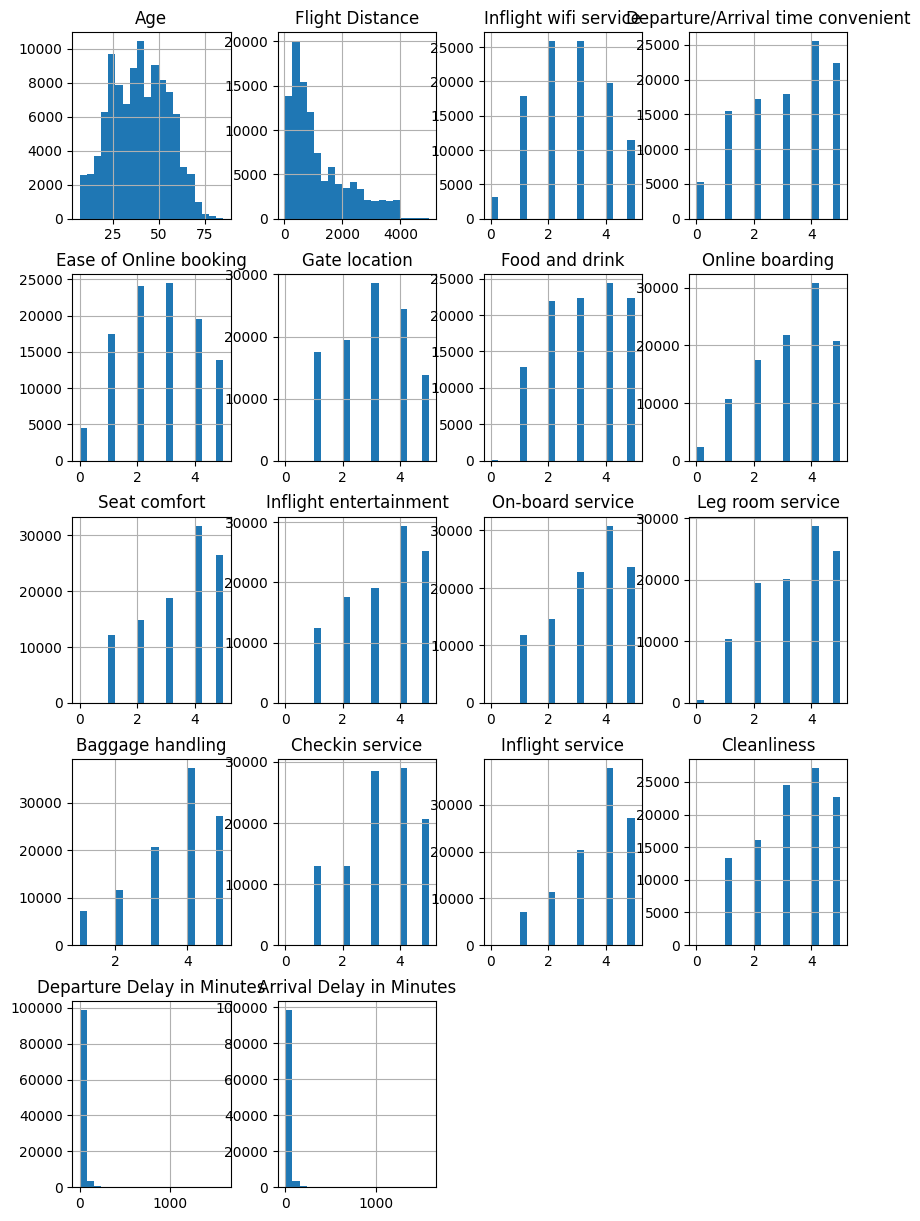

In [207]:
df.select_dtypes("number").hist(figsize=(10,15),bins=20)
plt.show()

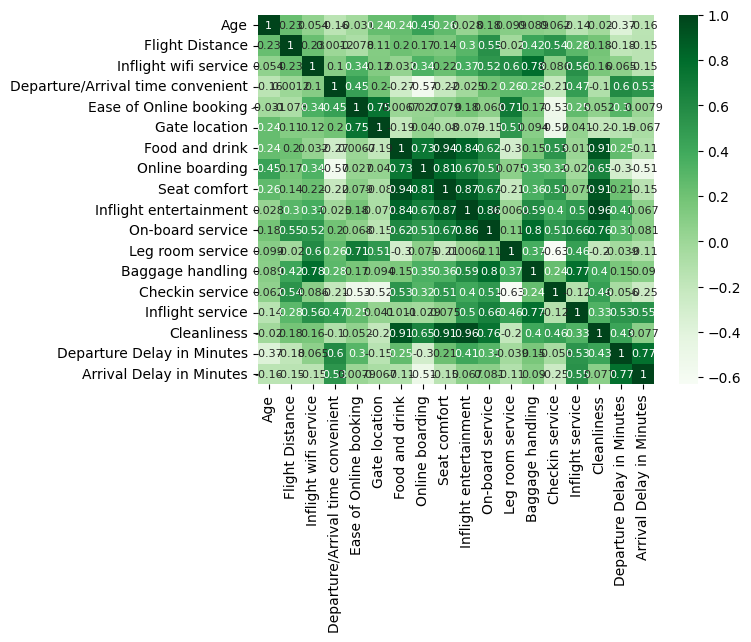

In [208]:
sns.heatmap(df.select_dtypes("number").head(10).corr(),annot=True,cmap="Greens",annot_kws={"size":8})
plt.show()

In [209]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [210]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

#### missing values: 

In [211]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].std(),inplace=True)

C:\Users\Top10\AppData\Local\Temp\ipykernel_1524\151170384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].std(),inplace=True)


#### splitting data : 

In [212]:


x=df.drop(columns='satisfaction')
y=df['satisfaction']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

#### encoding : 

In [213]:
cate_cols =df.select_dtypes("object").columns
cate_cols

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [214]:
for col in cate_cols:
    print(f"{col,df[col].unique()}\n")

('Gender', array(['Male', 'Female'], dtype=object))

('Customer Type', array(['Loyal Customer', 'disloyal Customer'], dtype=object))

('Type of Travel', array(['Personal Travel', 'Business travel'], dtype=object))

('Class', array(['Eco Plus', 'Business', 'Eco'], dtype=object))

('satisfaction', array(['neutral or dissatisfied', 'satisfied'], dtype=object))



In [215]:
le=LabelEncoder()

for n in x_train.select_dtypes("object"):
    x_train[n]=le.fit_transform(x_train[n])
    x_test[n]=le.transform(x_test[n]) 
    print(f"Encoder for {col}:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))
    print()

    
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)     

Encoder for satisfaction:
{'Female': np.int64(0), 'Male': np.int64(1)}

Encoder for satisfaction:
{'Loyal Customer': np.int64(0), 'disloyal Customer': np.int64(1)}

Encoder for satisfaction:
{'Business travel': np.int64(0), 'Personal Travel': np.int64(1)}

Encoder for satisfaction:
{'Business': np.int64(0), 'Eco': np.int64(1), 'Eco Plus': np.int64(2)}



In [216]:
x_train["Class"].unique()

array([1, 0, 2])

#### Scaling : 

In [217]:
x_train=pd.DataFrame(x_train,columns=x.columns)

In [218]:
num_cols=x_train.select_dtypes("number").columns
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train[num_cols])
x_test=scaler.transform(x_test[num_cols])

In [219]:
x_train

array([[ 1.        ,  0.        , -1.20833333, ...,  0.        ,
         0.25      ,  0.15384615],
       [ 1.        ,  0.        ,  0.20833333, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.08333333, ..., -0.5       ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.        ,  0.25      , ..., -1.        ,
        21.66666667, 20.23076923],
       [ 0.        ,  0.        , -0.125     , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -1.08333333, ...,  0.5       ,
         0.        ,  0.        ]], shape=(77928, 22))

#### handling outlier : 

In [220]:
x_train_df=pd.DataFrame(x_train,columns=x.columns)


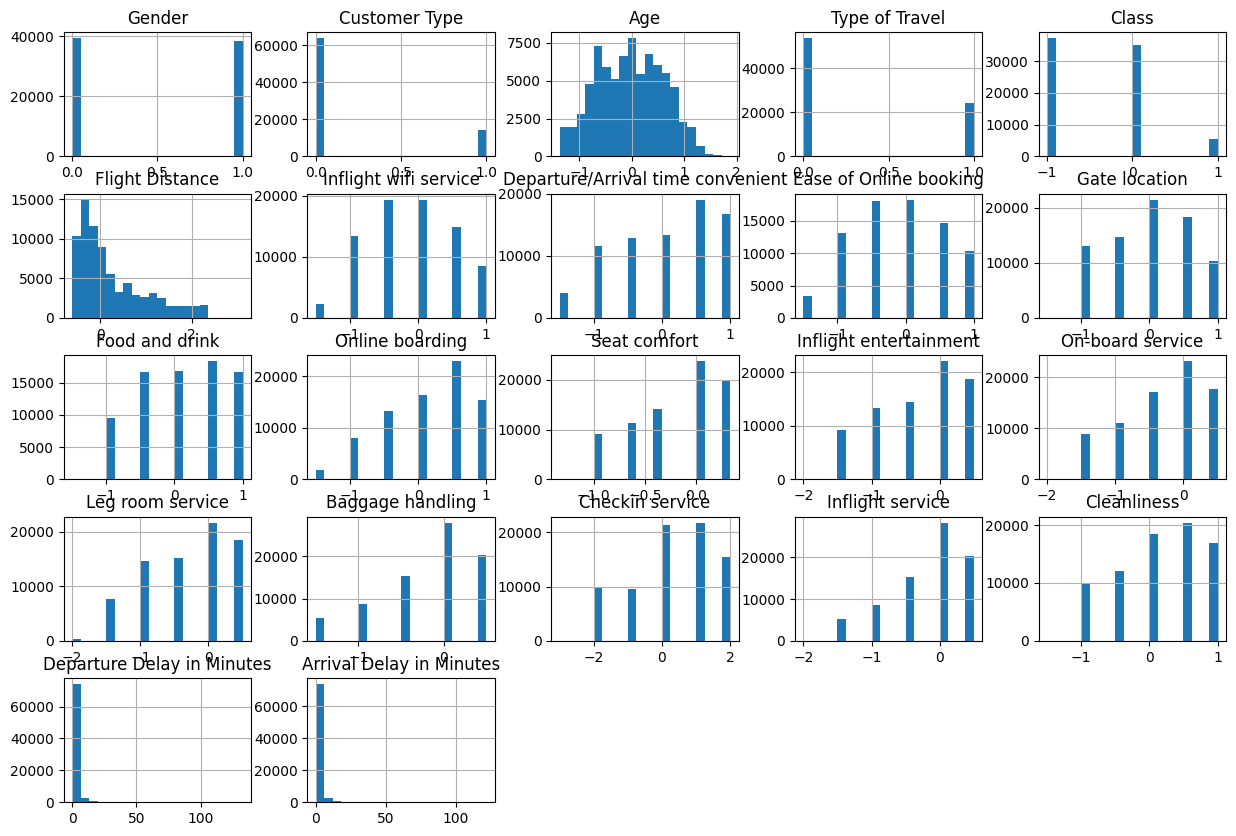

In [221]:

x_train_df.hist(figsize=(15,10),bins=20)
plt.show()

In [222]:

x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [223]:
for col in x_train.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class']):
   
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = x_train[col].median()

    x_train.loc[(x_train[col] < lower) | (x_train[col] > upper), col] = median
    x_test.loc[(x_test[col] < lower) | (x_test[col] > upper), col] = median

In [224]:
y_train=pd.DataFrame(y_train,columns=['satisfaction'])

#### balancing data : 


In [225]:
!pip install -U imbalanced-learn

In [226]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_res,y_train_res=sm.fit_resample(x_train, y_train)

#### Modeling : 

In [227]:
from sklearn.metrics import accuracy_score,classification_report

In [228]:
model_logistic=LogisticRegression()
model_logistic.fit(x_train_res,y_train_res)
y_pred=model_logistic.predict(x_test)
print(f"accuracy {accuracy_score(y_test,y_pred)}")
print(f"classification_report {classification_report(y_test,y_pred)}")



c:\Users\Top10\conda\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 0.8670311056359716
classification_report               precision    recall  f1-score   support

           0       0.89      0.88      0.88     14677
           1       0.84      0.85      0.85     11299

    accuracy                           0.87     25976
   macro avg       0.86      0.87      0.86     25976
weighted avg       0.87      0.87      0.87     25976



In [229]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train_res,y_train_res)
y_pred2=model_rf.predict(x_test)
print(f"accuracy {accuracy_score(y_test,y_pred2)}")
print(f"classification_report {classification_report(y_test,y_pred2)}")

c:\Users\Top10\conda\envs\myenv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy 0.9611564521096396
classification_report               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14677
           1       0.97      0.94      0.95     11299

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [230]:
model_xgb=XGBClassifier()
model_xgb.fit(x_train_res,y_train_res)
y_pred2=model_xgb.predict(x_test)
print(f"accuracy {accuracy_score(y_test,y_pred2)}")
print(f"classification_report {classification_report(y_test,y_pred2)}")

accuracy 0.9605789959963043
classification_report               precision    recall  f1-score   support

           0       0.95      0.98      0.97     14677
           1       0.97      0.94      0.95     11299

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [231]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train_res,y_train_res)
y_pred3=model_knn.predict(x_test)
print(f"accuracy {accuracy_score(y_test,y_pred3)}")
print(f"classification_report {classification_report(y_test,y_pred3)}")

c:\Users\Top10\conda\envs\myenv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy 0.9240452725592855
classification_report               precision    recall  f1-score   support

           0       0.92      0.94      0.93     14677
           1       0.92      0.90      0.91     11299

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [232]:
model_svm=SVC()
model_svm.fit(x_train_res,y_train_res)
y_pred4=model_svm.predict(x_test)
print(f"accuracy {accuracy_score(y_test,y_pred4)}")
print(f"classification_report {classification_report(y_test,y_pred4)}")

c:\Users\Top10\conda\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 0.9524946104096089
classification_report               precision    recall  f1-score   support

           0       0.95      0.96      0.96     14677
           1       0.95      0.94      0.95     11299

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [233]:
x_train_res

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,-1.208333,1.0,0.0,-0.180316,-1.000000,0.500000,-1.0,-1.000000,...,-0.333333,-0.500000,-0.500000,0.000000,0.500000,1.000000,0.000000,0.000000,0.25000,0.153846
1,1.0,0.0,0.208333,0.0,-1.0,-0.296769,0.500000,0.500000,0.5,0.500000,...,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,-1.000000,1.000000,0.00000,0.000000
2,0.0,0.0,0.083333,0.0,0.0,0.085650,0.500000,-1.000000,-1.0,-1.000000,...,0.000000,-0.500000,-0.500000,0.000000,-0.500000,2.000000,-0.500000,-0.500000,0.00000,0.000000
3,0.0,0.0,0.458333,1.0,0.0,-0.510143,0.000000,0.500000,0.0,0.000000,...,0.000000,0.000000,0.000000,-0.500000,0.000000,-1.000000,0.000000,-0.500000,0.00000,0.000000
4,1.0,0.0,-0.291667,0.0,-1.0,1.785124,-0.500000,1.000000,1.0,1.000000,...,-0.666667,-1.000000,0.000000,-1.500000,-0.500000,0.000000,-0.500000,-0.500000,0.00000,1.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88399,0.0,0.0,-0.195332,0.0,-1.0,0.754815,0.500000,0.500000,0.5,0.500000,...,0.000000,0.500000,0.500000,0.500000,0.500000,2.000000,0.500000,0.927110,0.00000,0.000000
88400,0.0,0.0,-0.433740,0.0,0.0,0.007742,0.382262,-0.617738,-0.5,-0.500000,...,-0.078492,-0.117738,0.500000,-0.617738,-1.500000,-0.235476,-1.117738,0.382262,0.00000,0.000000
88401,1.0,0.0,-0.233153,0.0,-1.0,0.698754,-0.500000,-0.500000,-0.5,-0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.287230,0.500000,0.00000,0.044189
88402,0.0,0.0,0.708986,0.0,-1.0,0.589124,0.000000,0.000000,0.0,0.000000,...,0.286461,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.14323,0.330532


### feature selection :

In [234]:


importances = model_rf.feature_importances_
feature_names = x_train_res.columns
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi_df = fi_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
selected_features = fi_df['feature'][:12].tolist()
x_train_selected = x_train_res[selected_features]
x_test_selected = x_test[selected_features]  
fi_df.head(12)


,feature,importance
0,Online boarding,0.149809
1,Inflight wifi service,0.142820
2,Class,0.114508
3,Type of Travel,0.099549
4,Inflight entertainment,0.066567
5,Seat comfort,0.043632
6,Ease of Online booking,0.042796
7,Leg room service,0.041205
8,Customer Type,0.037737
9,Flight Distance,0.032179


In [235]:
final_model = RandomForestClassifier()
final_model.fit(x_train_selected,y_train_res)
y_pred_f=final_model.predict(x_test_selected)
print(f"accuracy {accuracy_score(y_test,y_pred_f)}")
print(f"classification_report {classification_report(y_test,y_pred_f)}")

c:\Users\Top10\conda\envs\myenv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy 0.9489528795811518
classification_report               precision    recall  f1-score   support

           0       0.95      0.96      0.96     14677
           1       0.95      0.93      0.94     11299

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [236]:
import pickle 
with open("model.pkl","wb") as f :
    pickle.dump(final_model , f)